In [ ]:
# COCO Class names
class_names = ['BG', 'person', 'dressing table', 'bed', 'draws', 'matress',
               'cot', 'table', 'mirror', 'fan', 'ac ',
               'light', 'chair', 'couch', 'potted plant', 'bed']

In [ ]:
# Load a random image from the images folder
image = skimage.io.imread('sample.jpg')

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

In [ ]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# **Edge-Based Segmentation**

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# Copyright (c) Facebook, Inc. and its affiliates.
import numpy as np
import os
from pathlib import Path
import tqdm
from PIL import Image


def convert(input, output):
    img = np.asarray(Image.open(input))
    assert img.dtype == np.uint8
    img = img - 1  # 0 (ignore) becomes 255. others are shifted by 1
    Image.fromarray(img).save(output)


if __name__ == "__main__":
    dataset_dir = Path(os.getenv("DETECTRON2_DATASETS", "datasets")) / "ADEChallengeData2016"
    for name in ["training", "validation"]:
        annotation_dir = dataset_dir / "annotations" / name
        output_dir = dataset_dir / "annotations_detectron2" / name
        output_dir.mkdir(parents=True, exist_ok=True)
        for file in tqdm.tqdm(list(annotation_dir.iterdir())):
            output_file = output_dir / file.name
            convert(file, output_file)

# **Threshold-Based Segmentation**


In [ ]:
def compute_metrics(eval_pred):
...     with torch.no_grad():
...         logits, labels = eval_pred
...         logits_tensor = torch.from_numpy(logits)
...         logits_tensor = nn.functional.interpolate(
...             logits_tensor,
...             size=labels.shape[-2:],
...             mode="bilinear",
...             align_corners=False,
...         ).argmax(dim=1)

...         pred_labels = logits_tensor.detach().cpu().numpy()
...         metrics = metric.compute(
...             predictions=pred_labels,
...             references=labels,
...             num_labels=num_labels,
...             ignore_index=255,
...             reduce_labels=False,
...         )
...         for key, value in metrics.items():
...             if type(value) is np.ndarray:
...                 metrics[key] = value.tolist()
...         return metrics

In [ ]:
import matplotlib.pyplot as plt

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

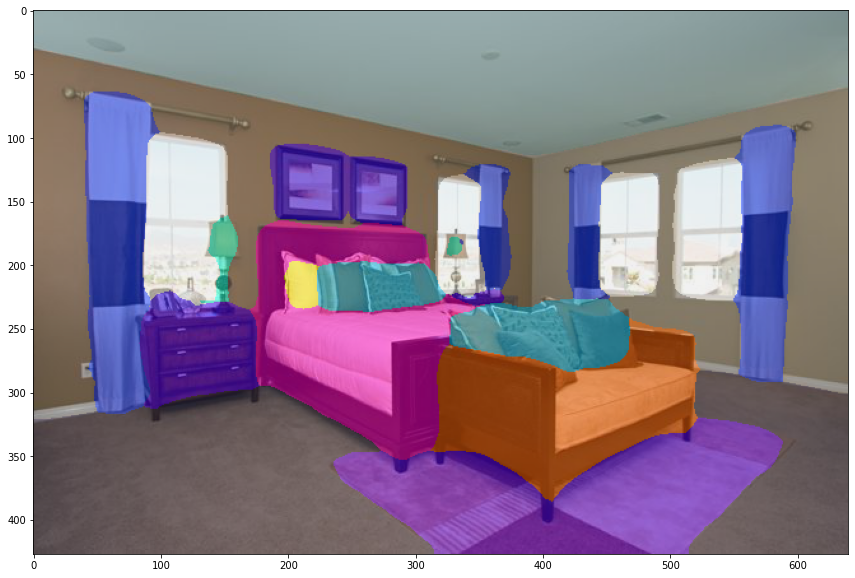

In [ ]:
from transformers import AutoModelForSemanticSegmentation, TrainingArguments, Trainer

>>> pretrained_model_name = "nvidia/mit-b0"
>>> model = AutoModelForSemanticSegmentation.from_pretrained(
...     pretrained_model_name, id2label=id2label, label2id=label2id
... )

# **Region-Based Segmentation**

In [ ]:
training_args = TrainingArguments(
...     output_dir="segformer-b0-scene-parse-150",
...     learning_rate=6e-5,
...     num_train_epochs=50,
...     per_device_train_batch_size=2,
...     per_device_eval_batch_size=2,
...     save_total_limit=3,
...     evaluation_strategy="steps",
...     save_strategy="steps",
...     save_steps=20,
...     eval_steps=20,
...     logging_steps=1,
...     eval_accumulation_steps=5,
...     remove_unused_columns=False,
...     push_to_hub=True,
... )


In [ ]:
trainer.push_to_hub()

# **Cluster-Based Segmentation**

In [ ]:
image = ds[0]["image"]
>>> image

In [ ]:
from transformers import pipeline

segmenter = pipeline("image-segmentation", model="my_awesome_seg_model")
segmenter(image)

In [ ]:
from transformers import pipeline

>>> segmenter = pipeline("image-segmentation", model="my_awesome_seg_model")
>>> segmenter(image)
[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062690>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062A50>},
 {'score': None,
  'label': 'floor',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062B50>},
 {'score': None,
  'label': 'ceiling',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062A10>},
 {'score': None,
  'label': 'bed ',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062E90>},
 {'score': None,
  'label': 'windowpane',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062390>},
 {'score': None,
  'label': 'cabinet',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062550>},
 {'score': None,
  'label': 'chair',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062D90>},
 {'score': None,
  'label': 'armchair',
  'mask': <PIL.Image.Image image mode=L size=640x427 at 0x7FD5B2062E10>}]

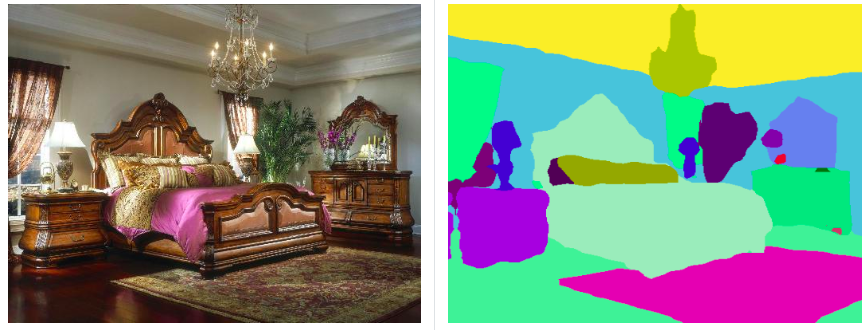

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
# use GPU if available, otherwise use a CPU
encoding = feature_extractor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)

# **Watershed Segmentation**

In [ ]:
import matplotlib.pyplot as plt

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

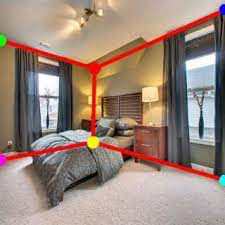

In [ ]:
 outputs = model(pixel_values=pixel_values)
logits = outputs.logits.cpu()

In [ ]:
def train_transforms(example_batch):
     images = [jitter(x) for x in example_batch["image"]]
     labels = [x for x in example_batch["annotation"]]
     inputs = feature_extractor(images, labels)
     return inputs

def val_transforms(example_batch):
     images = [x for x in example_batch["image"]]
     labels = [x for x in example_batch["annotation"]]
     inputs = feature_extractor(images, labels)
     return inputs